# 실습 5:Numerical Sol (Root of Equ), Integration, Differentiation (2023.10.18)
### 빅데이터수치해석 입문 및 실습
### 숙명여자대학교 기계시스템학부 심주용

- Reference: Advanced Engineering Mathematics Book by Erwin Kreyszig



# 문제 6.

“빅데수 실습2 SVD, PCA, Eigen Face” 실습에서 사용한 dog.jpg 사진을 Singular Value Decomposition 했을 때 몇 번째 Rank-r SVD Approximation 했을 때 전체 데이터의 85%이상의 Variance를 유지할 수 있는 지 계산하세요.

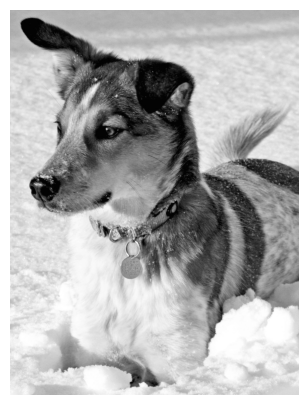

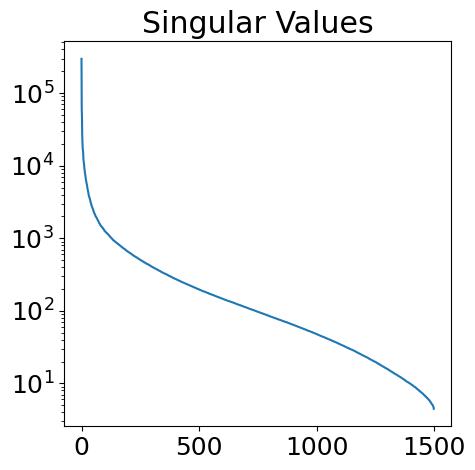

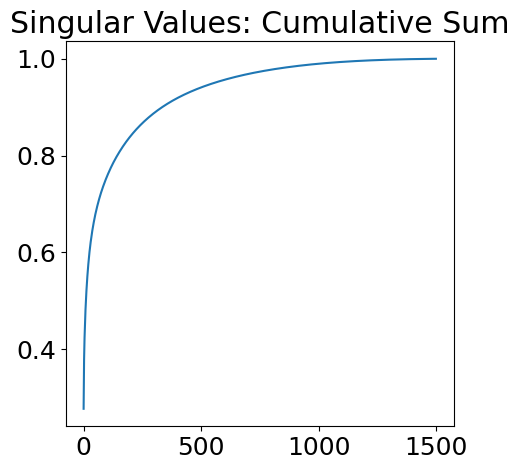

1

In [57]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [12, 6]

from urllib.request import urlretrieve
urlretrieve('https://github.com/jooyongsim/numerical2023/blob/main/src/dog.jpg?raw=true','dog.jpg')
A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

%matplotlib inline
plt.figure(figsize=[5,5])
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

plt.figure(figsize=[5,5])
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(figsize=[5,5])
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

s_cumsums_2 = np.cumsum(np.diag(S)**2)
s_sum_2 = np.sum(np.diag(S)**2)
criteria = s_cumsums_2/s_sum_2 >=0.85
n = s_cumsums_2.shape[0]
np.arange(1,n+1)[criteria].min()

In [58]:
criteria = s_cumsums_2/s_sum_2 >=0.95 # 95% 이상 variance를 설명하는 Rank-r approximation을 구한다면
print('criteria: ',criteria)
n = s_cumsums_2.shape[0]
print('n: ',n)
print('np.arange(1,n+1)[criteria]: ',np.arange(1,n+1)[criteria])
print('np.arange(1,n+1)[criteria].min(): ', np.arange(1,n+1)[criteria].min())

criteria:  [False False  True ...  True  True  True]
n:  1500
np.arange(1,n+1)[criteria]:  [   3    4    5 ... 1498 1499 1500]
np.arange(1,n+1)[criteria].min():  3


# 문제 7.

“빅데수 실습2 SVD, PCA, Eigen Face” 실습 중 Ovarian Cancer Gene Data에서 first principal component 로 암환자와 정상인을 Z=0을 기준으로 구별한다고 하였을 때 기준이 되는 값을 정하고 그때 전체 환자 중에서 환자가 아니라고 구별하는 경우의 정확도 %와 정상인중에서 정상인이 아니라고 구별하게 되는 경우의 정확도 %를 계산하세요.

number of patient: 216


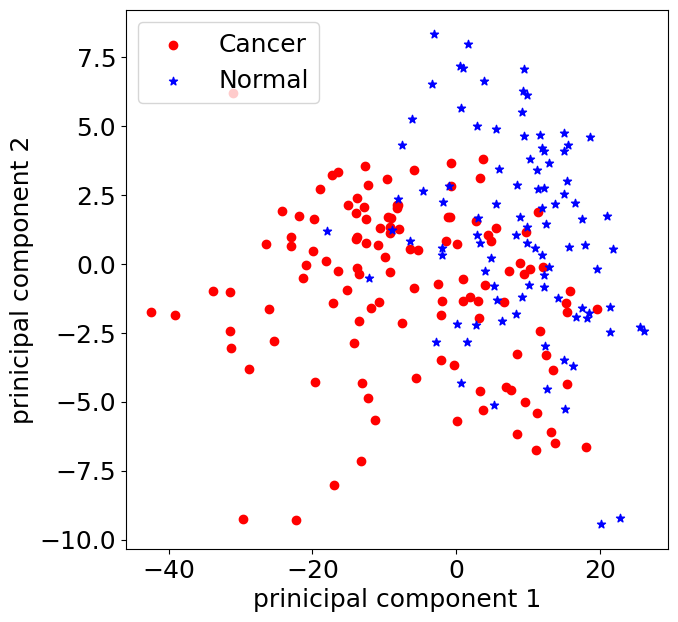

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_obs.csv','ovariancancer_obs.csv')
urlretrieve('https://jooyongsim.github.io/numerical2023/src/ovariancancer_grp.csv','ovariancancer_grp.csv')

obs = np.loadtxt('ovariancancer_obs.csv',delimiter=',')

f = open('ovariancancer_grp.csv', "r")
grp = f.read().split("\n")
grp = grp[:-1]
print('number of patient:', len(grp))
grp = np.array(grp)

obs_mean = obs - obs.mean(0)

U, S, VT = np.linalg.svd(obs_mean,full_matrices=False)

Z = obs_mean@VT.transpose()
classes = np.unique(grp)
i_pat = np.array(grp) == classes[0]
i_normal = np.array(grp) == classes[1]

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot()
ax.scatter(Z[i_pat,0],Z[i_pat,1],marker='o',color='r', label = classes[0])
ax.scatter(Z[i_normal,0],Z[i_normal,1],marker='*',color='b', label = classes[1])
ax.set_xlabel('prinicipal component 1')
ax.set_ylabel('prinicipal component 2')
ax.legend()
plt.show()

대략적으로 pc1 = 0을 기준을 두그룹을 나눌 수 있을 것이다. 이때 아래와 같이 0보다 크면 Normal, 작으면 Cancer Patient로 나눈다고 해보자. pc1 값만 기준으로 나누었을 때 정확도는 구별 정확도는 73.6% 이다.



In [61]:
pc1 = Z[:,0]
pred = np.where(pc1>=0,'Normal', 'Cancer')

sum(pred == grp)/grp.size*100

73.61111111111111

In [62]:
pred = np.where(pc1>=0,'Normal', 'Cancer')
pred

array(['Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Normal', 'Normal', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'Normal', 'Normal', 'Cancer', 'Cancer', 'Cancer',
       'Cancer', 'Cancer', 'Normal', 'Cancer', 'Normal', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Normal',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Cancer',
       'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Cancer',
       'Normal', 'Cancer', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Cancer', 'Normal',
       'Cancer', 'Normal', 'Cancer', 'Normal', 'Cancer', 'Cancer',
       'Cancer', 'Normal', 'Normal', 'Cancer', 'Normal', 'Normal',
       'Cancer', 'Cancer', 'Cancer', 'Normal', 'Cancer', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Cancer', 'Normal',
       'Normal', 'Cancer', 'Cancer', 'Cancer', 'Normal', 'Norm

In [63]:
print('환자를 환자로 인식하는 정확도 {}'.format(sum(pred[i_pat] == 'Cancer')/pred[i_pat].size*100))
print('정상인을 정상으로 인식하는 정확도 {}'.format(sum(pred[i_normal] == 'Normal')/pred[i_normal].size*100))

환자를 환자로 인식하는 정확도 65.28925619834712
정상인을 정상으로 인식하는 정확도 84.21052631578947


# 문제 9.

빅데수 실습2 SVD, PCA, Eigen Face” 실습 중 Ovarian Cancer Gene Data에서 2명의 유전자 데이터가 “ovariancancer_obs_test.csv”에 저장되어 문제와 함께 업로드되었습니다. 이때 각각 사람의 유전자 데이터의 first principal component를 이용하여 위 기준에서 2개의 데이터가 각각 환자인지 정상인인지 구별하세요.

In [65]:
urlretrieve('https://jooyongsim.github.io/numerical2023/ovariancancer_obs_test.csv','ovariancancer_obs_test.csv')

obs_test = np.loadtxt('ovariancancer_obs_test.csv',delimiter=',')
obs_test_mean = obs_test - obs.mean(0)

첫번째 환자의 PC1 을 구해보자. 아래와 같이 0보다 크기 때문에 정상인



In [66]:
obs_test_mean[0]@VT.T[:,0]

5.230125685170194

두번째 환자의 PC1 을 구해보자. 아래와 같이 0보다 크기 때문에 정상인



In [67]:
obs_test_mean[1]@VT.T[:,0]

11.920704126664416

# 문제 10.

문제와 함께 주어진 ‘random_data.csv’는 총 10000개의 데이터가 각각 두개의 변수(예, x, y 또는 x1, x2)에 대해 저장되어 있는 데이터입니다. 이 데이터셋의 principal component analysis를 이용해서 (2, 4)의 데이터 (즉, x = 2, y =4)에 대한 principal component 1과 2를 구하세요.

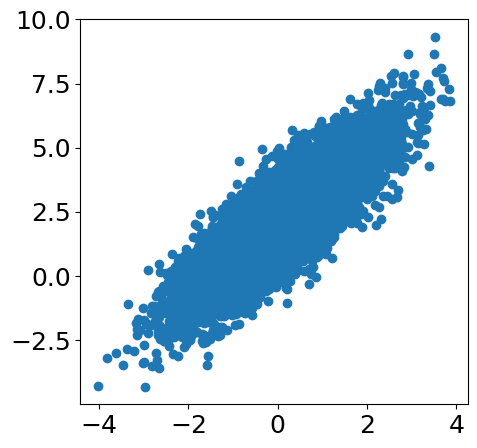

In [69]:
urlretrieve('https://jooyongsim.github.io/numerical2023/random_data.csv','random_data.csv')

data = np.loadtxt('random_data.csv',delimiter=',')
x = data[0,:]
y = data[1,:]

plt.figure(figsize=[5,5])
plt.scatter(x,y)
plt.show()

In [70]:
# data_mean = data.T - np.tile(data.mean(1).T,(data.shape[1],1))
# 아래 centering 연산은 위 연산과와 같음
x_mean = x - x.mean()
y_mean = y - y.mean()
data_mean = np.stack((x_mean, y_mean))
data_mean = data_mean.T
data_mean.shape

(10000, 2)

주의! 여기서 실험은 10000번, 각각의 실험에서 데이터가 x, y 두가지 변수가 있음.
따라서 matrix는 (2,10000) 이 아니라, (10000,2)로 변환하여야 합니다!



In [71]:
U, S, VT = np.linalg.svd(data_mean,full_matrices=False)
Z = data_mean@VT.transpose()

이제 위와같이 PCA를 수행합니다. 이때 covariance matrix의 eigen vectors 또는 \ PCA의 weight vectors 또는 loading vectors는 아래 matrix의 column vectors와 같습니다.

In [72]:
VT.T


array([[ 0.49966755,  0.86621726],
       [ 0.86621726, -0.49966755]])

pc1과 pc2를 비교하면 pc1의 variance가 최대화되었다는 것을 알 수 있습니다.



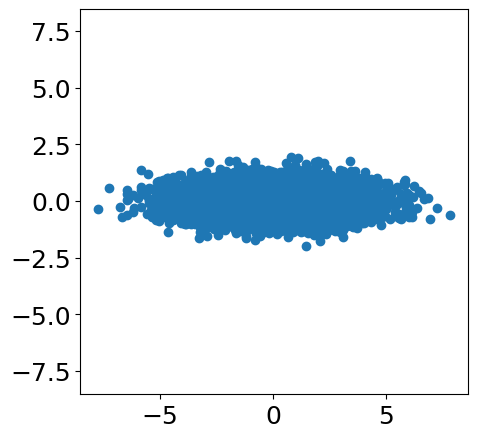

In [73]:
pc1 = data_mean@VT.T[:,0]
pc2 = data_mean@VT.T[:,1]

plt.figure(figsize=[5,5])
plt.scatter(pc1,pc2)
plt.axis('equal')
plt.show()

In [74]:
test_data = [2, 4]
test_data@VT.T

array([ 4.46420414, -0.26623566])

In [75]:
print('테스트 데이터의 pc1 = {}, pc2 = {}'.format(*(test_data@VT.T)))

테스트 데이터의 pc1 = 4.464204136806038, pc2 = -0.2662356567476618


## 문제 11. (공학수학 Chapter 20.5 연습문제 1번, Least Squares)

Fit a straight line to the given points by least squares. Show the details. Check your result by sketching the points and the line. Judge the goodness of fit.

주어진 점에 Least Squares(최소 제곱법)으로 직선 모델을 Fitting하세요. 데이터 포인트와 예측선을 그려서 예측선이 적합한지 결과를 확인하세요.

데이터: (0, 2), (2, 0), (3, 2), (5, 3)


-1.0384615384615383 1.8461538461538458


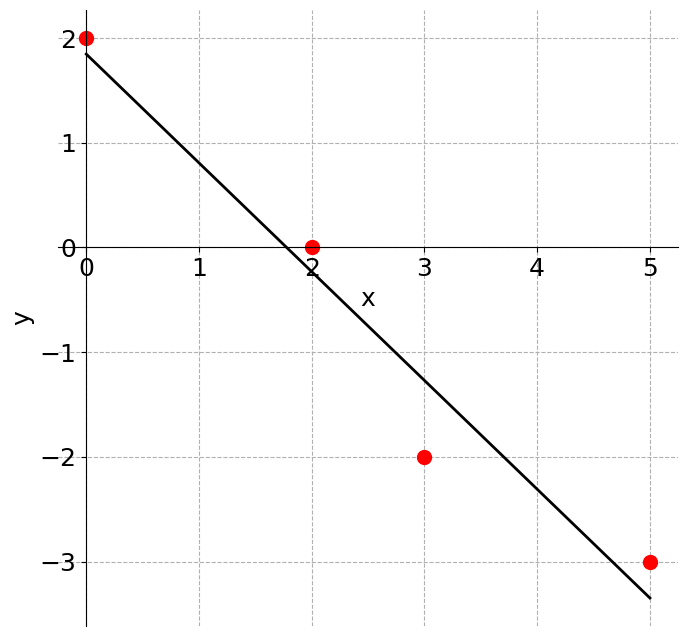

In [53]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.array([0, 2, 3, 5])
y = np.array([2, 0, -2, -3])

A = np.stack((x,np.ones(x.shape)),axis=1)
B = y

U, S, VT = np.linalg.svd(A,full_matrices=False)
pinv = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
(a, b) =  pinv @ B # Least-square fit
print(a, b)

xl = np.arange(0,5.2,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 문제 12. (공학수학 Chapter 20.5 연습문제 4번, A Hooke’s Law Example of Least Squares)

Hooke’s law F=kx: Estimate the spring modulus k from the force F [N] and the elongation x [m], where (F, x) is (1, 0.3), (2, 0.7), (4, 1.3), (6, 1.9), (10, 3.2), (20, 6.3).

다음 힘 F [N]와 변위 x [m] 측정 데이터로부터 Hooke’s law F=kx의 스프링상수 k를 추정하세요. (F, x)는 (1, 0.3), (2, 0.7), (4, 1.3), (6, 1.9), (10, 3.2), (20, 6.3)입니다.


[0.31757813] 0.01914062499999991
spring constant = 0.31757812500000004 N/m


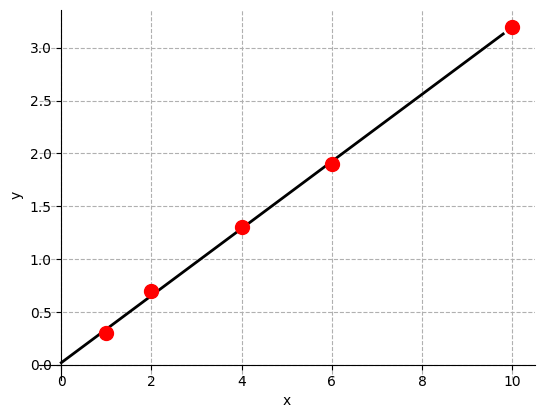

In [47]:
x = [1, 2, 4, 6, 10]
y = [0.3, 0.7, 1.3, 1.9, 3.2]
x = np.array(x)
x = x[:,np.newaxis]  # x should be always => dimension >2
y = np.array(y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
a, b = reg.coef_, reg.intercept_

print(a, b)

xl = np.arange(0,10,0.2)
yl = a*xl+b

fig, ax = plt.subplots()
ax.plot(xl, yl, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'o', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

print('spring constant = {} N/m'.format(a[0]))

# 문제13 Newton-Raphson

𝑓(𝑥) = 2 sin(√𝑥) − 𝑥 + 1

(a) 그래프를 통해 근사적으로x의 근을 예측하시오.

(b) Newton-Raphson 방법을 사용하여 구하시오. 초기 가정으로 x0=1를 사용하고 근사상대오차 ea<0.001%까지 계산하시오.



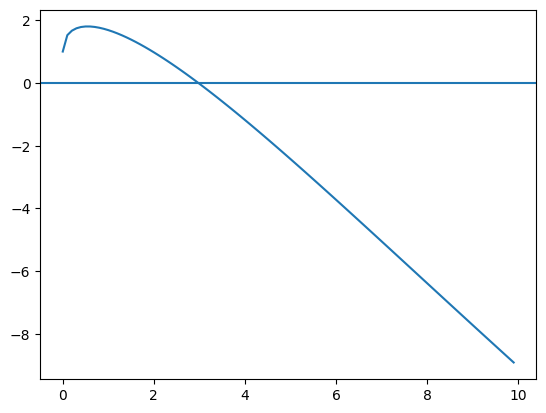

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 2*np.sin(x**(1/2))-x+1

x = np.arange(0,10,0.1)

plt.plot(x,func(x))
plt.axhline()

In [6]:
import numpy as np
def func(x):
    return 2*np.sin(x**(1/2))-x+1
def func_p(x):
    return -2*np.cos(x**(1/2))*1/2*x**(-1/2)-1

import numpy as np


N = 10; x0 = 1; tol = 1e-5; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:1.000000, xn+1:2.092605, error:5.221267e-01
n:1, xn:2.092605, xn+1:2.914223, error:2.819339e-01
n:2, xn:2.914223, xn+1:2.987262, error:2.444990e-02
n:3, xn:2.987262, xn+1:2.974020, error:-4.452486e-03
n:4, xn:2.974020, xn+1:2.976644, error:8.816419e-04
n:5, xn:2.976644, xn+1:2.976132, error:-1.721288e-04
n:6, xn:2.976132, xn+1:2.976232, error:3.370117e-05
n:7, xn:2.976232, xn+1:2.976212, error:-6.594727e-06
Solution of  2*sin(x^(1/2))-x+1=0 is 2.976212


# 문제 14

$𝑓(𝑥) = 2𝑥^3−11.7𝑥^2 + 17.7𝑥 − 6$

(a) 그래프를 통해 근사적으로x의 근을 예측하시오.

(b) Newton-Raphson 방법을 사용하시오. 초기 가정으로 x0=3를 사용하고 근사상대오차 e<0.001%까지 계산하시오

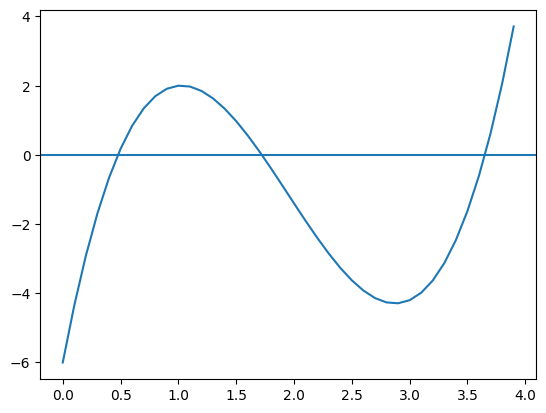

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return 2*x**3-11.7*x**2+17.7*x-6

x = np.arange(0,4,0.1)

plt.plot(x,func(x))
plt.axhline()

In [10]:
def func(x):
    return 2*x**3-11.7*x**2+17.7*x-6
def func_p(x):
    return 6*x**2-23.4*x+17.7

import numpy as np

N = 10; x0 = 3; tol = 1e-5; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:3.000000, xn+1:5.800000, error:4.827586e-01
n:1, xn:5.800000, xn+1:4.686948, error:-2.374790e-01
n:2, xn:4.686948, xn+1:4.037685, error:-1.608007e-01
n:3, xn:4.037685, xn+1:3.734625, error:-8.114882e-02
n:4, xn:3.734625, xn+1:3.656393, error:-2.139586e-02
n:5, xn:3.656393, xn+1:3.651167, error:-1.431438e-03
n:6, xn:3.651167, xn+1:3.651144, error:-6.247013e-06
Solution of  2*sin(x^(1/2))-x+1=0 is 3.651144


# 과제 15

다음 함수의 근을 구하시오. 초기 가정으로 x0=5를 사용하고 e<0.01% 까지 계산하시오.

$𝑓(𝑥) = −0.9𝑥^2 + 1.7𝑥 + 2.5$

(a) 그래프를 통해 근사적으로 x의 근을 예측하시오.

(b) Newton-Raphson 방법을 사용해서 근을 구하시오.

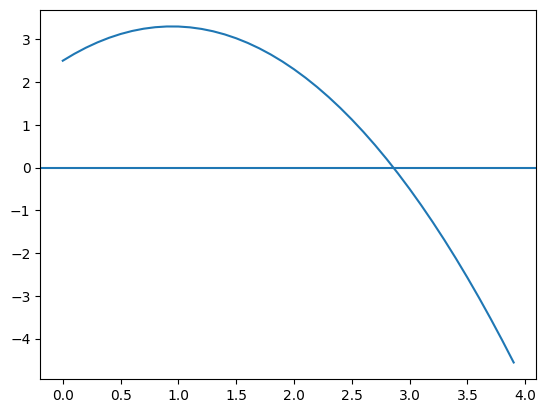

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return -0.9*x**2+1.7*x+2.5
def func_p(x):
    return -1.8*x+1.7

x = np.arange(0,4,0.1)

plt.plot(x,func(x))
plt.axhline()

In [16]:
def func(x):
    return -0.9*x**2+1.7*x+2.5
def func_p(x):
    return -1.8*x+1.7
import numpy as np

N = 10; x0 = 5; tol = 1e-4; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of  2*sin(x^(1/2))-x+1=0 is {xn:.6f}')

n:0, xn:5.000000, xn+1:3.424658, error:-4.600000e-01
n:1, xn:3.424658, xn+1:2.924357, error:-1.710805e-01
n:2, xn:2.924357, xn+1:2.861147, error:-2.209255e-02
n:3, xn:2.861147, xn+1:2.860105, error:-3.644225e-04
n:4, xn:2.860105, xn+1:2.860104, error:-9.913887e-08
Solution of  2*sin(x^(1/2))-x+1=0 is 2.860104


# 문제 16

다음 함수에 대해

$f(x) = x^2e^-x/\sqrt{1+x^2}$

(a) x=0 부터 x=2 사이까지 그래프를 그리고

(b) x=0, x=1, 그리고 x=2일 때 3개의 점을 이용하여 2차 다항식으로 interpolation한 함수를 함께 비교하여 그리세요.


Design Matrix for  $y = ax^2+bx+c $

$A*\beta = y$,
$ \beta = [a, b, c]$

In [38]:
# design matrix A*beta = y (beta = ax^2+bx+c = y)
def func(x):
  return x**2*np.exp(-x)/np.sqrt(1+x*2)

x = np.array([0, 1, 2])
dm = np.stack((x**2, x, np.ones(3)),axis=1)
[a,b,c] = np.linalg.inv(dm)@func(x)

dm, x, func(x), [a,b,c]

(array([[0., 0., 1.],
        [1., 1., 1.],
        [4., 2., 1.]]),
 array([0, 1, 2]),
 array([0.        , 0.21239529, 0.24209511]),
 [-0.09134773716115985, 0.30374303155082116, 0.0])

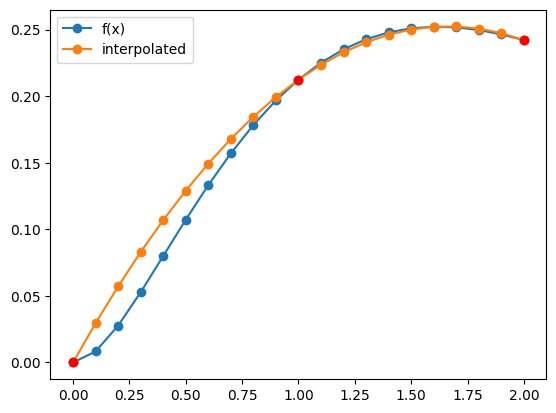

In [46]:
x = np.arange(0,2.1,0.1)
plt.plot(x,func(x),'-o')
plt.plot(x,a*x**2+x*b+c,'o-')
plt.plot([0,1,2],func(np.array([0,1,2])),'ro')
plt.legend(['f(x)', 'interpolated'])

(array([[0., 0., 1.],
        [1., 1., 1.],
        [4., 2., 1.]]),
 array([0, 1, 2]))


##  Numerical Sol (Root of Equ): Secant Method

Let's find a solution (root) of equation $ x^2=2 $ or $ x-2sinx=0 $


In [ ]:
def func(x):
    return x**2-2

N = 10; x0 = 2; x1 = 1.9; tol = 1e-5; xn_1 = x0; xn = x1

for i in range(N):
    fp = (func(xn)-func(xn_1))/(xn-xn_1)

    xnn = xn - func(xn)/fp

    error = (xnn - xn)/xnn
    print(f'n:{i+1}, xn-1:{xn_1:.6f}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')

    xn_1 = xn; xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of x-2sin(x)=0 is {xn:.6f}')

n:1, xn-1:2.000000, xn:1.900000, xn+1:1.487179, error:-2.775862e-01
n:2, xn-1:1.900000, xn:1.487179, xn+1:1.424678, error:-4.387041e-02
n:3, xn-1:1.487179, xn:1.424678, xn+1:1.414476, error:-7.212909e-03
n:4, xn-1:1.424678, xn:1.414476, xn+1:1.414215, error:-1.847388e-04
n:5, xn-1:1.414476, xn:1.414215, xn+1:1.414214, error:-6.833768e-07
Solution of x-2sin(x)=0 is 1.414214


## Numerical Integration: Rectangular rule and trapezoidal rule

Here we will integrate a function for a given range. Consider a function $f(x)=e^{-x^2}$ from 0 to 1. First, integrate the function analytically.

In [ ]:
import sympy

x = sympy.symbols("x")
exp = sympy.exp(-x**2)
exact_awnwer = sympy.integrate(exp, (x, 0, 1)).evalf(8)
exact_awnwer

0.74682413

In [ ]:
import numpy as np

# trapezoidal
def func(x):
    return np.exp(-x**2)

N = 10
h = 1/N
int_sum = 0 # integration 값을 담는 그릇
xj = 0
for j in range(N+1):
    if j == 0 or j == N:
        int_sum += func(xj)*0.5*h
    else:
        int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

trape_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(trape_error/exact_awnwer*100))

j= 0 , xj= 0  , function= 1.0  
j= 1 , xj= 0.1, function= 0.9900498337491681
j= 2 , xj= 0.2, function= 0.9607894391523232
j= 3 , xj= 0.3, function= 0.9139311852712282
j= 4 , xj= 0.4, function= 0.8521437889662113
j= 5 , xj= 0.5, function= 0.7788007830714049
j= 6 , xj= 0.6, function= 0.697676326071031
j= 7 , xj= 0.7, function= 0.6126263941844161
j= 8 , xj= 0.8, function= 0.5272924240430487
j= 9 , xj= 0.9, function= 0.4448580662229412
j= 10, xj= 1.0, function= 0.3678794411714424
0.7462107961317493
% error trapezoidal: 0.0821260388973603


In [ ]:
import numpy as np

# rectangular rule
def func(x):
    return np.exp(-x**2)

N = 10
h = 1/N
int_sum = 0 # integration 값을 담는 그릇
xj = 0
for j in range(N):
    if j == 0:
        xj = xj + h/2
    else:
        xj = xj + h

    int_sum += func(xj)*h
    print('j= {:<2}, xj= {:<3}, function= {:<5}'.format(j, np.round(xj,2), func(xj)))
    xj += h
print(int_sum)

trape_error = int_sum-exact_awnwer
print('% error trapezoidal:',abs(trape_error/exact_awnwer*100))

j= 0 , xj= 0.05, function= 0.9975031223974601
j= 1 , xj= 0.25, function= 0.9394130628134758
j= 2 , xj= 0.45, function= 0.8166864825981108
j= 3 , xj= 0.65, function= 0.6554062543268406
j= 4 , xj= 0.85, function= 0.48553689515407955
j= 5 , xj= 1.05, function= 0.3320399453446608
j= 6 , xj= 1.25, function= 0.2096113871510978
j= 7 , xj= 1.45, function= 0.12215066953998995
j= 8 , xj= 1.65, function= 0.0657102732275028
j= 9 , xj= 1.85, function= 0.032630755992895964
0.4656688848546115
% error trapezoidal: 37.6467813308141


## Numerical Differentiation

Let's go through an example of differentiation for the function $f(x)=e^{-x^2}$ from 0 to 1 with 0.1 interval.

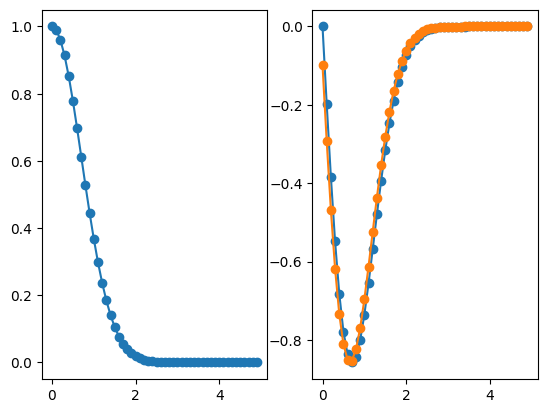

In [ ]:
def func(x):
    return np.exp(-x**2)
def func_p(x):
    return -2*x*np.exp(-x**2)
x = np.arange(0,5.1,0.1)
fp = (func(x[1:])-func(x[:-1]))/0.1

import matplotlib.pyplot as plt
plt.subplot(121)
plt.plot(x[:-1],func(x[:-1]),'o-')
plt.subplot(122)
plt.plot(x[:-1],func_p(x[:-1]),'o-')
plt.plot(x[:-1],fp,'-o')

In [ ]:
!jupyter nbconvert --to html solution.ipynb

[NbConvertApp] Converting notebook solution.ipynb to html
[NbConvertApp] Writing 634227 bytes to solution.html
